### Here we check individual dataset group models to see whether orbito-frontal weights are caused by a specific dataset or not


In [1]:
import numpy as np
import pandas as pd
import nibabel as nb
import Functional_Fusion.dataset as fdata # from functional fusion module
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.data as cdata
import cortico_cereb_connectivity.cio as cio
import cortico_cereb_connectivity.summarize as cs
import cortico_cereb_connectivity.scripts.script_summarize_weights as cssw
import matplotlib.pyplot as plt
import seaborn as sns
import Functional_Fusion.atlas_map as am
import nitools as nt
import warnings
import SUITPy as suit

/home/UWO/ashahb7/Documents/cortico/lib/python3.8/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/UWO/ashahb7/Documents/cortico/lib/python3.8/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


In [2]:
parcellation = 'Icosahedron162'
method = 'NNLS_parallel'

yeo_img = nb.load(gl.conn_dir + f'/maps/yeo17_{parcellation}.plabel.nii')
yeo_data = yeo_img.get_fdata().squeeze()
atlas,ainf = am.get_atlas('MNISymC3')

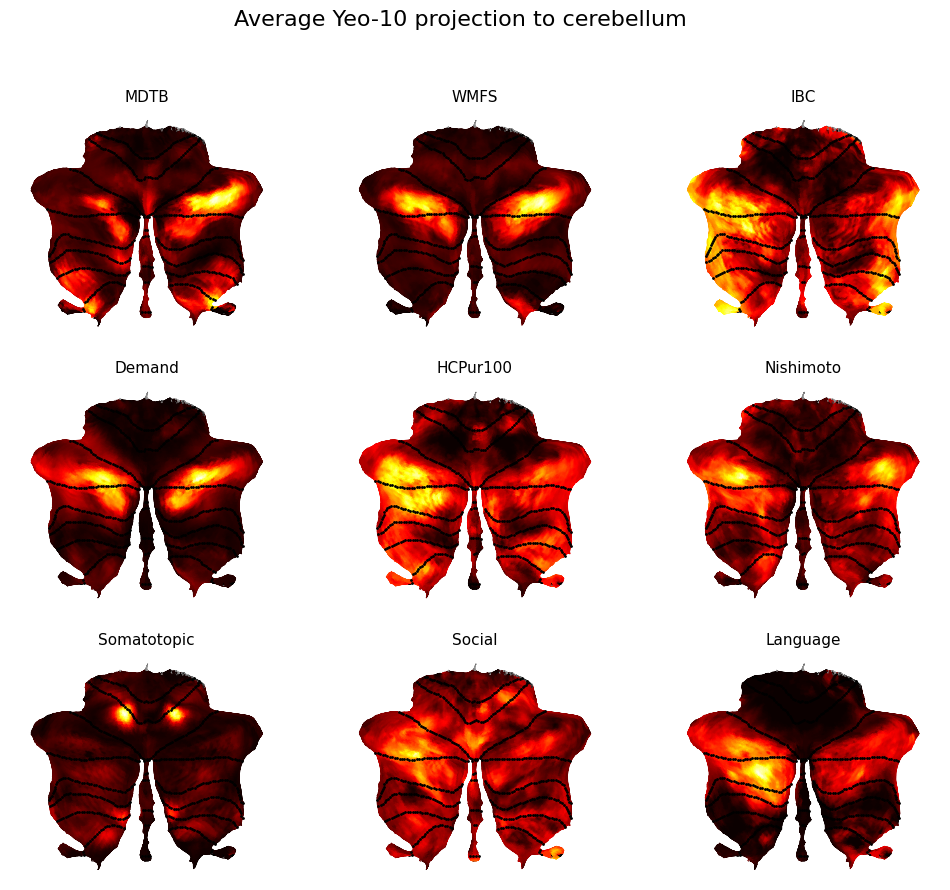

In [3]:
fig, axes = plt.subplots(np.ceil(len(gl.datasets)/3).astype(int), 3, figsize=(12, 10))
for i, (traindata, ses) in enumerate(zip(gl.datasets, gl.sessions)):
    mroot = f"{traindata}_{ses}_{parcellation}_{method}"
    model, _ = cio.load_model(gl.conn_dir + f"/MNISymC3/train/{mroot}/{mroot}_A2_group")  

    project = model.coef_[:, yeo_data==10].mean(axis=1)
    nifti_image = atlas.data_to_nifti(project)
    data = suit.vol_to_surf(nifti_image,space='MNISymC')
    plt.subplot(np.ceil(len(gl.datasets)/3).astype(int), 3, i+1)
    suit.flatmap.plot(data,cmap='hot', new_figure=False)
    axes.flat[i].set_title(traindata, fontsize=11)
plt.suptitle(f'Average Yeo-10 projection to cerebellum', fontsize=16);

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/MDTB_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


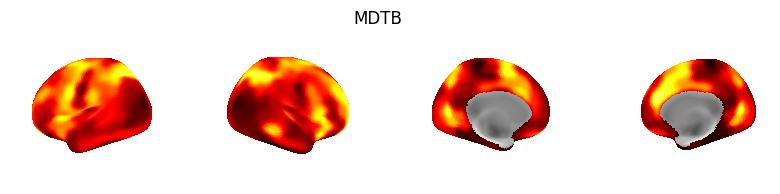

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/WMFS_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


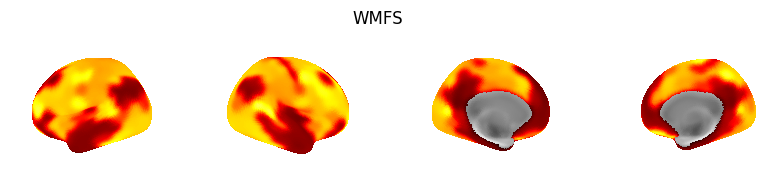

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/IBC_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


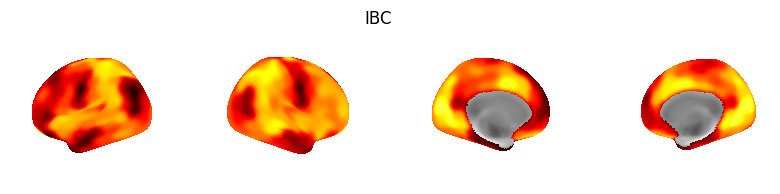

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/Demand_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


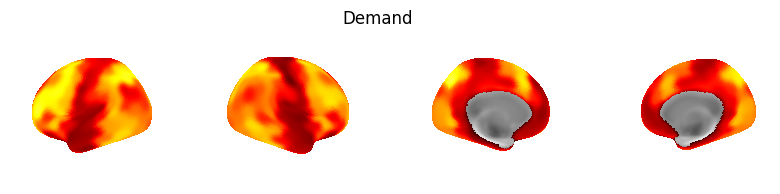

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/HCPur100_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


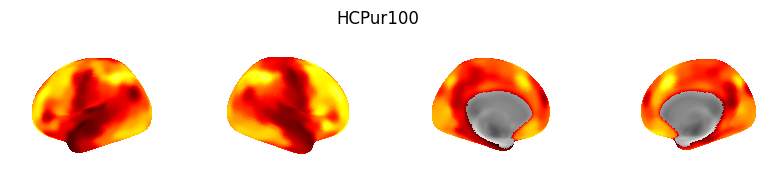

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/Nishimoto_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


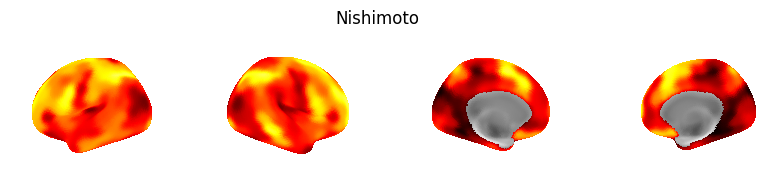

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/Somatotopic_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


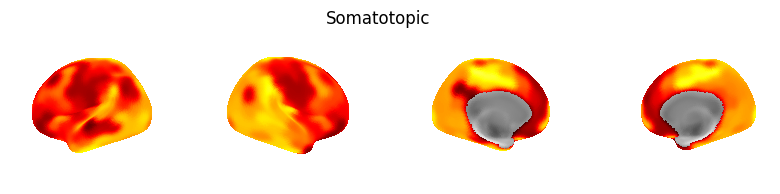

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/Social_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


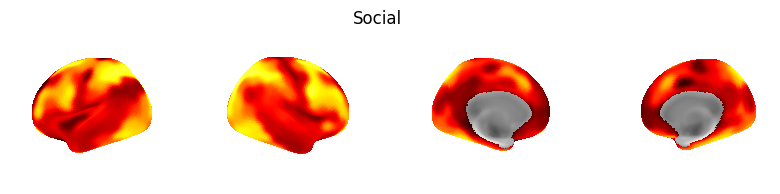

wb_command -cifti-smoothing 'temp.dscalar.nii' 4.0 0.0 COLUMN /cifs/diedrichsen/data/Cerebellum/connectivity/maps/Language_Icosahedron162_NNLS_parallel_prob.dscalar.nii -left-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-L_inflated.surf.gii -right-surface /cifs/diedrichsen/data/FunctionalFusion_new/Atlases/tpl-fs32k/tpl-fs32k_hemi-R_inflated.surf.gii


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


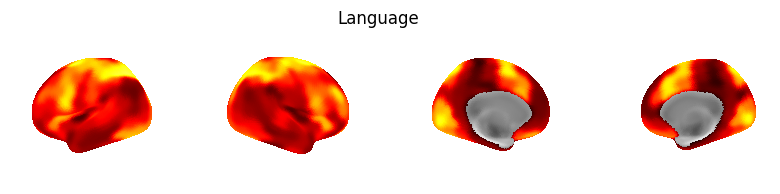

In [ ]:
for traindata, ses in zip(gl.datasets, gl.sessions):
    cifti_img = cs.stats_weight_map_cortex(traindata = f"{traindata}_{ses}",
                            cortex_roi = parcellation,
                            method = method,
                            extension='A2_group',
                            stats = 'prob')
    fname = gl.conn_dir + f'/maps/{traindata}_{parcellation}_{method}_prob.pscalar.nii'
    nb.save(cifti_img,fname)

    fname = f'{traindata}_{parcellation}_{method}_prob.pscalar.nii'
    oname = f'{traindata}_{parcellation}_{method}_prob.dscalar.nii'
    cs.pscalar_to_smoothed_dscalar(fname,oname)

    cifti_img = nb.load(gl.conn_dir + f'/maps/{traindata}_{parcellation}_{method}_prob.dscalar.nii')
    data = nt.surf_from_cifti(cifti_img) 
    fig, axes = plt.subplots(1, 4, subplot_kw={'projection': '3d'},figsize=(10, 2))
    cs.plot_cortical_inflated(data=data,axes=axes, cscale=[np.nanmin(data[0])*0.8, np.nanmax(data[0])*1.])
    plt.suptitle(traindata, fontsize=12)
    plt.show()